<a href="https://colab.research.google.com/github/karanidenis/alu-machine_learning/blob/main/NN_cvd_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRJECT NAME: CVDX**

## Built by:

1. **Denis Waweru** - d.waweru@alustudent.com

# Case Study and Implementation

Case Study Summary: Health Data Classification


# The Dataset
**Short Description of the Data:**

The dataset has a shape of (70000, 12) whichh is 70000 rows and 12 columns. The columns include age, gender,	height,	weight,	ap_hi,	ap_lo,	cholesterol,	gluc,	smoke,	alco,	active and cardio. Each column is important in the training of the model. The task is to develop a model that can learn and generalize from this data to accurately tell status of a patient(positive or negative).

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
# from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


Connect Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Processing

### Read the data. Drop the 'id' column. Change the age values from days to years.

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/cardio_train.csv'
df = pd.read_csv(path, sep=';')
df.drop('id', axis=1, inplace=True)
df['age'] = df['age'] // 365
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


## The Columns include:
      Id - which I drop
      Age - in days, Below it's converted to years
      Gender - 1 for male and 2 for female
      Height - in cms
      Weight - in kgs
      ap_hi - systolic bp
      ap_lo - diastolic bp
      cholestrol - cholestrol levels
      gluc - glucose levels
      smoke - smoking habits. 1 for active smoker and 0 for non- smokers
      alco - Alcohol habits. 1- alcoholic
      active - physical activities habits. 1 for active person
      cardio - target(1 for person with cvd)

### Set X as all other columns/features except cardio. Set y as the target('cardio' column). generate 2D arrays of the dataset.

In [4]:
# generate 2d classification dataset
X = df.drop('cardio', axis=1).to_numpy()
y = df['cardio'].to_numpy()
print(X[:2])
print(X.shape)
print(y[:1])
print(y.shape)

[[ 50.   2. 168.  62. 110.  80.   1.   1.   0.   0.   1.]
 [ 55.   1. 156.  85. 140.  90.   3.   1.   0.   0.   1.]]
(70000, 11)
[0]
(70000,)


### Split the dataset into training and testing datasets. Then split the train set to train and validation set. Scale the sets.

In [5]:

from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Split the Train dataset to validation set and train set
train_x, X_val, train_y, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Check the sizes of the splits
print(train_x.shape, X_val.shape, X_test.shape, train_y.shape, y_val.shape, y_test.shape)
print(train_x[:1])
print(train_y[:1])

scaler = StandardScaler()
scaler.fit(X_train)
# Scale the training data
X_train_scaled = scaler.transform(train_x)
print(X_train_scaled[:1])
# Scale the test data
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled[:1])

# Scale the validation data
X_val_scaled = scaler.transform(X_val)
print(X_val_scaled)

(42000, 11) (14000, 11) (14000, 11) (42000,) (14000,) (14000,)
[[ 61.   2. 168.  84. 130.  90.   1.   1.   1.   1.   1.]]
[1]
[[ 1.20611167  1.36282377  0.44603662  0.68319785  0.00850798 -0.03548701
  -0.53919351 -0.39463256  3.20431048  4.1515181   0.49410558]]
[[ 0.91083466 -0.73377059 -1.01963223 -0.7094615   0.07591891 -0.08599847
   0.93286365 -0.39463256 -0.31207962 -0.24087574  0.49410558]]
[[ 1.64902718 -0.73377059 -0.40893688 ... -0.31207962 -0.24087574
   0.49410558]
 [ 0.02500364 -0.73377059 -1.38604945 ... -0.31207962 -0.24087574
  -2.02385896]
 [ 0.76319616 -0.73377059 -1.75246666 ... -0.31207962  4.1515181
   0.49410558]
 ...
 [-0.27027337 -0.73377059 -0.53107595 ... -0.31207962 -0.24087574
   0.49410558]
 [ 1.50138868 -0.73377059 -1.87460573 ... -0.31207962 -0.24087574
   0.49410558]
 [ 1.05847316  1.36282377  1.30101012 ... -0.31207962 -0.24087574
   0.49410558]]


# Model Implementation

## 1. Without Regularization


### 1. Model Architecture

Layers:

    (Dense) of shape (None, 500). Input layer with 500 neurons.

    (Dense) of shape (None, 128). Input layer with 128 neurons.
                                                                    
    (Dense) of shape (None, 64). hidden layer with 64 neurons.
                                                                    
    (Dense) of shape (None, 32). Hidden layer with 32 neurons.

    (Dense) of shape (None, 16). Hidden layer with 16 neurons.

    (Dense) of shape (None, 8). Hidden layer with 8 neurons.
    
    (Dense) of shape (None, 1). 1 output layer    
                                                             

### 2. Model Training

In [6]:
from keras.callbacks import LearningRateScheduler

model = Sequential()
model.add(Dense(500, input_dim=11, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Implement a learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Compile the model with an optimizer and learning rate
model.compile(loss=binary_crossentropy,
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
model.save('model1.pkl')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               6000      
                                                                 
 dense_1 (Dense)             (None, 128)               64128     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [7]:
train_model = model.fit(X_train_scaled, train_y,
                  # batch_size=128,
                  epochs=50,
                  verbose=1,
                  callbacks=[callback],
                  validation_data=(X_val_scaled, y_val))



Epoch 1/50
1313/1313 [==============================] - 8s 5ms/step - loss: 0.6140 - accuracy: 0.6694 - val_loss: 0.5670 - val_accuracy: 0.7186 - lr: 1.0000e-04
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5605 - accuracy: 0.7244 - val_loss: 0.5424 - val_accuracy: 0.7359 - lr: 1.0000e-04
Epoch 3/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5498 - accuracy: 0.7291 - val_loss: 0.5411 - val_accuracy: 0.7361 - lr: 1.0000e-04
Epoch 4/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.5469 - accuracy: 0.7305 - val_loss: 0.5394 - val_accuracy: 0.7371 - lr: 1.0000e-04
Epoch 5/50
1313/1313 [==============================] - 7s 6ms/step - loss: 0.5453 - accuracy: 0.7320 - val_loss: 0.5398 - val_accuracy: 0.7341 - lr: 1.0000e-04
Epoch 6/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5447 - accuracy: 0.7325 - val_loss: 0.5437 - val_accuracy: 0.7317 - lr: 1.0000e-04
Epoch 7/50
1313/1313 [============

Train: 0.744, Test: 0.741


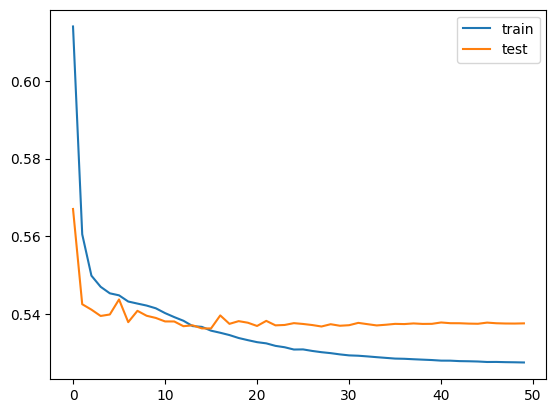

In [8]:
_, train_acc = model.evaluate(X_train_scaled, train_y, verbose=0)
_, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(train_model.history['loss'], label='train')
plt.plot(train_model.history['val_loss'], label='test')
plt.legend()
plt.show()

### Print out the Model Accuracy and plot the Loss curve

In [9]:
# evaluate the model
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5430020689964294
Test accuracy: 0.7412857413291931


In [11]:

def make_predictions(model_path):
    """
    Parameters:
    - X_test_scaled: numpy.ndarray, preprocessed feature data for testing the model.
    - y_test_scaled: numpy.ndarray, true labels for the test data.
    """

    # Load the model
    model = load_model(model_path)

    # Generate predictions
    y_pred = model.predict(X_test_scaled)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return cm

model_path = '/content/sample_data/model1.pkl'
make_predictions(model_path)

438/438 [==============================] - 4s 7ms/step


array([[ 408, 6580],
       [ 469, 6543]])

## 2. Combined **regularization**

### Model Architecture

Layers:

    Input Dense Layer (5000 Neurons) with L2 Regularization. It has 500 neurons & applies a ReLU (Rectified Linear Unit) activation function.

    Dropout Layer of shape (None, 128) with l1 regularization & applies the ReLU activation function.

    Dense Layer with (64 Neurons) & applies the ReLU activation function.

    Dense Layer (32 Neurons) with l2 regularization & applies the ReLU activation function

    Dense Layer (16 Neurons) with l1 regularization & applies the ReLU activation function.

    Dense Layer (8 Neurons) applies the ReLU activation function

    Output Dense Layer (1 Neuron) & sigmoid activation function


In [12]:

combined_model = Sequential([
    Dense(500, activation='relu', input_dim=11, kernel_regularizer=l2(0.01)),  # L2 regularization
    # Dropout(0.5),  # Dropout
    Dense(128, activation='relu', kernel_regularizer=l1(0.01)),  # L2 regularization
    Dense(64, activation='relu'),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu'),
    # Dropout(0.5),  # Dropout
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

combined_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])
combined_model.save('combined.pkl')

combined_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 500)               6000      
                                                                 
 dense_8 (Dense)             (None, 128)               64128     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 8)                

Epoch 22: early stopping
Train: 0.727, Test: 0.731


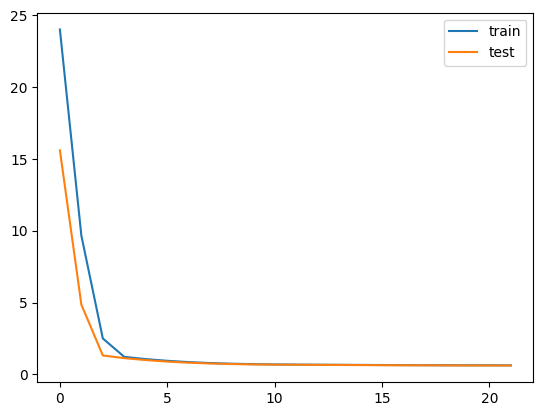

In [13]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# fit model
ctrain_model = combined_model.fit(X_train_scaled, train_y,
                              batch_size=128,
                    epochs=1000,
                    verbose=0,
                    validation_data=(X_val_scaled, y_val),
                              callbacks=[es])

# evaluate the model
_, train_acc = combined_model.evaluate(X_train_scaled, train_y, verbose=0)
_, test_acc = combined_model.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(ctrain_model.history['loss'], label='train')
plt.plot(ctrain_model.history['val_loss'], label='test')
plt.legend()
plt.show()

In [14]:
score = combined_model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.6199178099632263
Test accuracy:  0.730571448802948


In [15]:
model_path = '/content/combined.pkl'
make_predictions(model_path)

438/438 [==============================] - 1s 2ms/step


array([[ 991, 5997],
       [1263, 5749]])

# Comparison of different models:

In [16]:
# 1. Model without Regularization:
score = model.evaluate(X_test_scaled, y_test, verbose=0)
normal = score[1] * 100
print("None optimized Model's Accuracy: %.2f" % normal + "%")

# combined regularization Model:
score = combined_model.evaluate(X_test_scaled, y_test, verbose=0)
c = score[1] * 100
print("optimized Model's accuracy: %.2f" % c + "%")

None optimized Model's Accuracy: 74.13%
optimized Model's accuracy: 73.06%


# Testing the Model:


In [19]:

def predict(data):
  new_df = pd.DataFrame([data])
  new_df['gender'] = new_df['gender'].map({'Male': 1, 'Female': 2})

  # Here, assume all features need scaling.
  scaled_features = scaler.transform(new_df)

  predictions = {}

  # Models list
  models = [('model', model),
            ('combined_model', combined_model)]

  # Make a prediction with each model
  for name, modell in models:
      y_pred = modell.predict(scaled_features)
      # Assuming binary classification and model.predict returns a probability
      class_label = (y_pred >= 0.5).astype(int)
      predictions[name] = class_label[0][0]  # Adjust based on your model's output shape

  for model_name, class_label in predictions.items():
      print(f"{model_name} Class Label: {class_label}")

  # return predictions


test_data = {
    'age': 55,
    'gender': 'Female',
    'height': 156,
    'weight': 85.0,
    'ap_hi': 140,
    'ap_lo': 90,
    'cholesterol': 3,
    'gluc': 1,
    'smoke': 0,
    'alco':0,
    'active': 1
}
predict(test_data)
# 55	1	156	85.0	140	90	3	1	0	0	1	> 1 got 1
# 51	1	165	64.0	130	70	3	1	0	0	0 > 1 got 1
# 50	2	168	62.0	110	80	1	1	0	0	1	> 0 got 0
# age	gender	height	weight	ap_hi	ap_lo	cholesterol	gluc	smoke	alco	active	cardio

1/1 [==============================] - 0s 21ms/step
model Class Label: 1
combined_model Class Label: 1
